In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import apply_combined_noise, add_gaussian_noise, add_label_noise

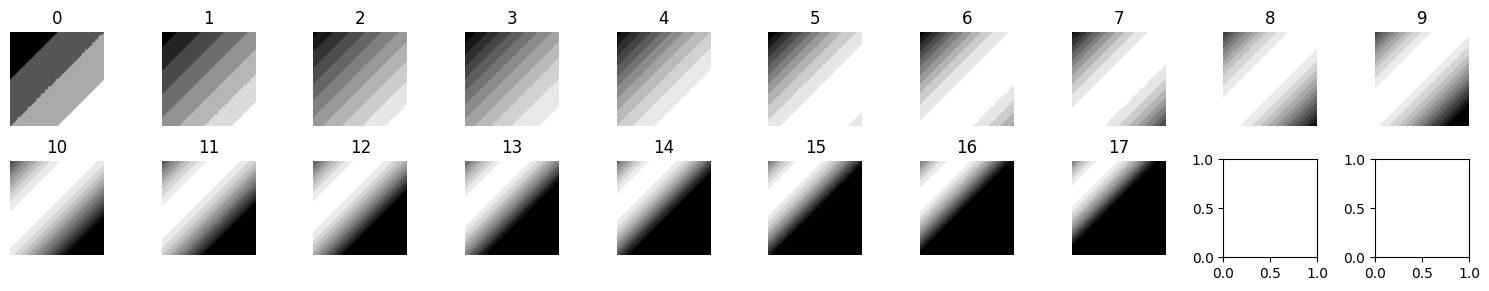

In [2]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(18):
    sample = add_label_noise(np.zeros((64, 64)), label)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


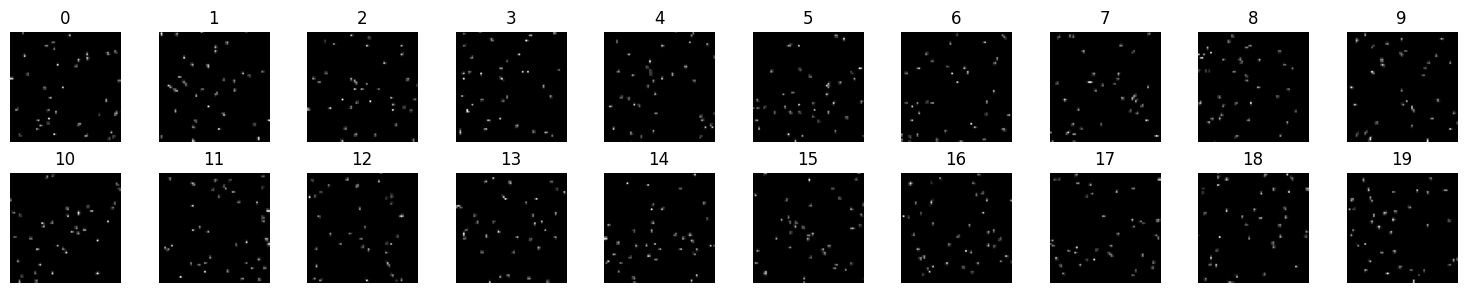

In [3]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = apply_combined_noise(np.zeros((64, 64)))
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


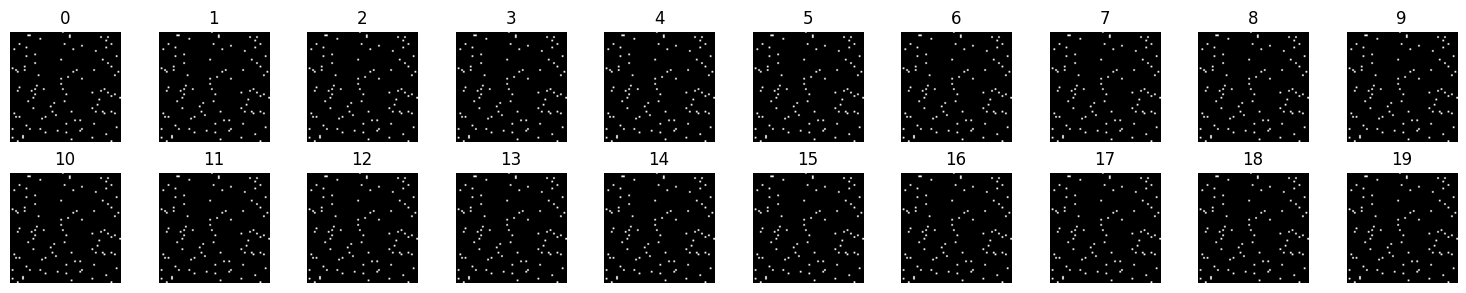

In [4]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_gaussian_noise(np.zeros((64, 64)), mean=0.0, std=0.002)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [5]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 0",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 1",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 2",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 3",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 4",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 5",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 6",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 7",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 8",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 9",
]

In [6]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Shape of imags are: torch.Size([36793, 1, 64, 64])
Total images lodded: 36793


Label 0: 4651 number of images
Label 1: 4273 number of images
Label 2: 3878 number of images
Label 3: 2944 number of images
Label 4: 3958 number of images
Label 5: 3878 number of images
Label 6: 3240 number of images
Label 7: 3355 number of images
Label 8: 3382 number of images
Label 9: 3234 number of images


Dataset loaded successfully!


In [7]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [7]:
X.shape

torch.Size([36793, 1, 64, 64])

In [8]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
X = X.reshape(-1, 64*64)

Text(0.5, 1.0, 'Label: 0')

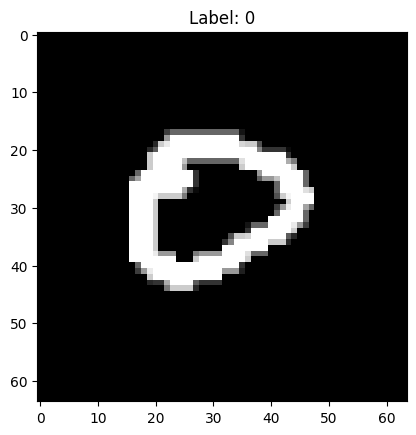

In [10]:
ind = np.random.randint(0, X.shape[0]-1)
plt.imshow(X[ind].reshape(64, 64), cmap='gray')
plt.title(f"Label: {y[ind]}")

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


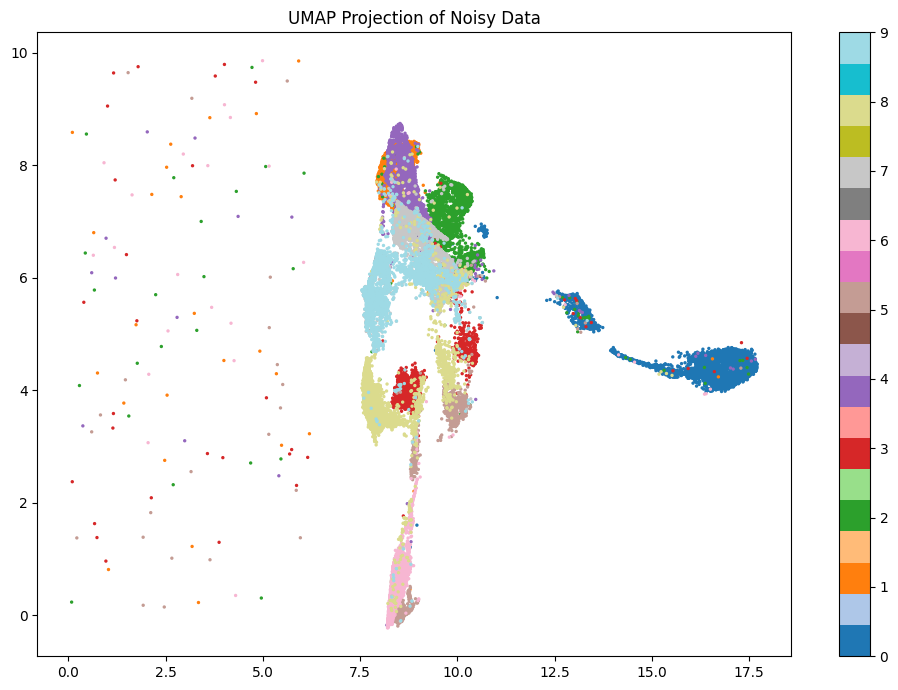

In [12]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=64*64)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()

In [13]:
# Define a bounding box for the central region (adjust as needed)
x_min, x_max = 4, 10  # X-axis range for the central cluster
y_min, y_max = 2, 6   # Y-axis range for the central cluster

# Filter points in the central region
central_region = (X_umap[:, 0] >= x_min) & (X_umap[:, 0] <= x_max) & \
                 (X_umap[:, 1] >= y_min) & (X_umap[:, 1] <= y_max)

# Get the unique classes in the central region
overlapping_classes = np.unique(y[central_region])

print(f"Classes in the overlapping region: {overlapping_classes}")
print(f"Number of overlapping classes: {len(overlapping_classes)}")

Classes in the overlapping region: [0 1 2 3 4 5 6 7 8 9]
Number of overlapping classes: 10


In [21]:
dist = []
for i in range(len(overlapping_classes)):
    for j in range(i + 1, len(overlapping_classes)):
        class_i = overlapping_classes[i]
        class_j = overlapping_classes[j]
        
        # Get the points for each class
        points_i = X_umap[y == class_i]
        points_j = X_umap[y == class_j]
        
        # Calculate the distance between the centroids of the two classes
        centroid_i = np.mean(points_i, axis=0)
        centroid_j = np.mean(points_j, axis=0)
        distance = np.linalg.norm(centroid_i - centroid_j)
        
        dist.append((class_i, class_j, distance))

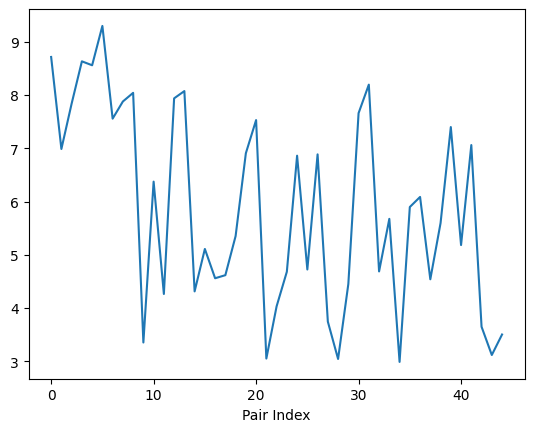

In [22]:
plt.plot([d[2] for d in dist])
plt.xlabel("Pair Index");

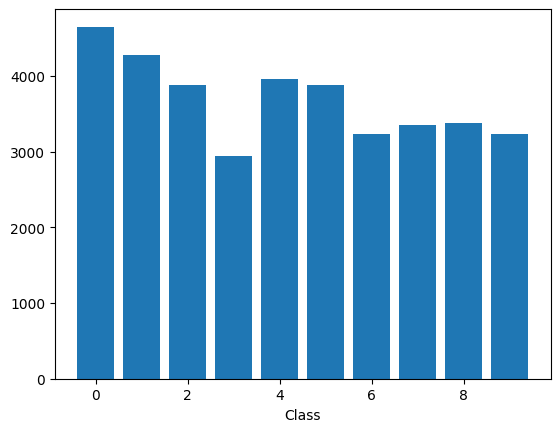

In [11]:
distribution = []
for i in range(10):
    distribution.append(y[y == i].shape[0])
plt.bar(range(10), distribution)
plt.xlabel("Class");

In [14]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [14]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

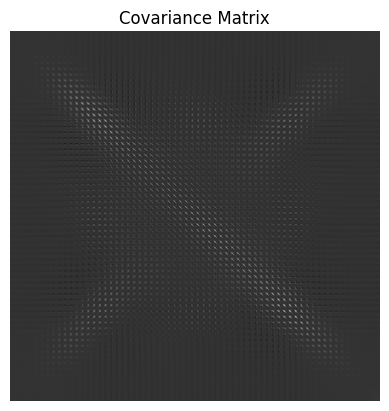

In [15]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [18]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95037035, 0.95083908, 0.95130769, 0.95177618, 0.95224419,
       0.95271244, 0.95318057, 0.95364893, 0.95411683, 0.9545846 ,
       0.95505225, 0.95551907, 0.95598577, 0.95645235, 0.95691881,
       0.95738515, 0.95785137, 0.95831747, 0.95878346, 0.95924932,
       0.9597134 , 0.96017759, 0.96064334, 0.96110896, 0.96157364,
       0.96203819, 0.96250262, 0.96296694, 0.96343089, 0.96389473,
       0.96435845, 0.9648199 , 0.96528147, 0.96574317, 0.9662045 ,
       0.96666571, 0.96712681, 0.96758778, 0.96804864, 0.96850783,
       0.96896713, 0.96942656, 0.9698861 , 0.97034577, 0.97080484,
       0.97126378, 0.97172261, 0.97218132, 0.97263825, 0.97309505,
       0.97355173, 0.97400829, 0.97446474, 0.97492106, 0.97537727,
       0.97583336, 0.97628932, 0.97674517, 0.9772009 , 0.97765472,
       0.97810843, 0.97856201, 0.97901547, 0.97946882, 0.97992204,
       0.98037515, 0.98082813, 0.981281  , 0.98173375, 0.98218638,
       0.98263889, 0.98308985, 0.98354069, 0.98399141, 0.98444

In [19]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
# W = eigenvectors
W.shape

torch.Size([4096, 3986])